In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Writing Blog Posts with Jupyter and Hugo

Tags: writing, python  

date: 2020-08-02T08:00:00+10:00

feature_image: /images/jupyter-blog.png
  
<!--eofm-->

It can be convenient to directly publish a mixture of prose, source code and graphs.
It ensures the published code actually runs and makes it much easier to rerun at a later point.
I've done this before in Hugo with [R Blogdown](/blogdown), and now I'm experimenting with Jupyter notebooks.

The best available [option](https://discourse.gohugo.io/t/ipython-notebook-support/3211/15) seems to be [nb2hugo](https://github.com/vlunot/nb2hugo) which converts the notebook to markdown, keeping the front matter exporting the images.

How to use it; based loosely on the [demo](https://github.com/vlunot/nb2hugo-demo/):

1. Create a Jupyter notebook; for example in the ./notebook repository of your blog
2. Rename the notebook based on what you want the URL to end with
3. Add front matter as `key: value` separated, unquoted pairs followed by `<!--eofm-->`.
4. Install nb2hugo from source or pypi (e.g. `python -m pip install nb2hugo`)
5. Run nb2hugo on your notebook: `nb2hugo notebooks/jupyter-hugo-blog.ipynb --site-dir ./ --section post`. Note site-dir is the path to the root of your hugo website, and section is where you want it posted.
6. Build your website with Hugo

The `nb2hugo` script will create a new file with the same name in `{site-dir}/content/{section}/{name}.md` and extracts all your images as separate files in `{site-dir}/static/{section}/{name}/`.

## Example of a generated image

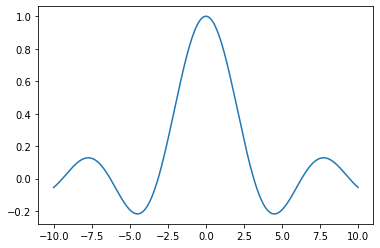

In [3]:
x = np.arange(-10, 10, 0.01)
y = np.sin(x) / x
plt.plot(x, y)

I had to work around a few issues to get this to work.

## Fixing broken front matter

If the frontmatter had any quotes around it, or `=` signs instead of colons, then the generated frontmatter would be very broken.
It seems that the method to extract front matter is quite fragile.

```
# Writing Blog Posts with Jupyter and Hugo

Tags: writing, python  

date: 2020-08-02T08:00:00+10:00

feature_image: /images/jupyter-blog.png
  
<!--eofm-->
```

## Fixing path routing issues

In my case I use rewriting rules to remove the `/post/` from the URL.
In my Hugo `config.toml` I do that with the following configuration

```
[permalinks]
  post = "/:filename/"
```

Unfortunately the image is referenced as a local file like `output.png`.
This means the file is being looked at in `/:filename/output.png` when it's been saved ad `/post/:filename/output.png` which means it's not rendered.
For this post I just moved the folder.

Unforutnately this doesn't seem configurable, and the nb2hugo repository seems stale.
So either I'll need to script up moving the files after, get Hugo to move the file, or develop my own fork of nb2hugo to handle these issues.

Nevertheless nb2hugo does a lot of the heavy lifting and makes it possible to publish reasonable looking blogs from a Jupyter notebook like this one.
Blogdown is definitely a nicer experience, but even for R I sometimes [use Jupyter notebook](/display-r-jupyter), and so it's good to have it as an option.